# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?



---------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
# 3.3 Visualizing Relationships Between Quantitative Features Lab
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("Employee_productivity.csv")

# Overview
print("Rows:", len(df))
display(df.head())
print("\nData types:")
print(df.dtypes)


Rows: 300


,HoursWorked,FocusScore,ProductivityScore,Department,YearsAtCompany,TeamMeetingsPerWeek,DeskLocation
0,42.4,6.3,3127.96,Engineering,17,0,Open Plan
1,34.0,7.2,4742.60,HR,8,6,Private Office
2,47.2,5.6,2044.73,Sales,15,3,Remote
3,38.4,9.0,5818.92,HR,5,6,Private Office
4,36.4,2.5,1841.31,Sales,9,6,Remote



Data types:
HoursWorked            float64
FocusScore             float64
ProductivityScore      float64
Department              object
YearsAtCompany           int64
TeamMeetingsPerWeek      int64
DeskLocation            object
dtype: object


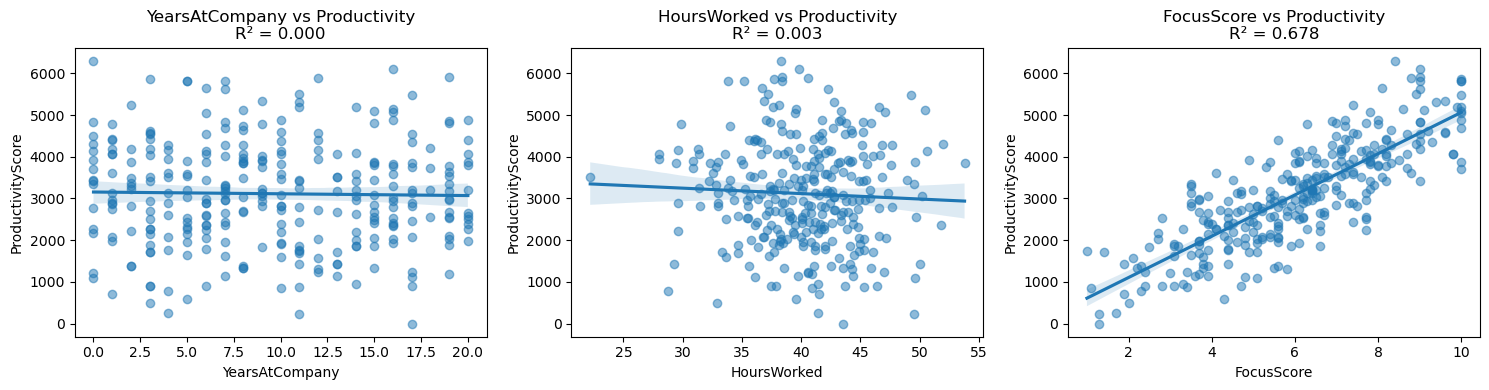

R² values by feature:
YearsAtCompany: 0.000
HoursWorked: 0.003
FocusScore: 0.678


In [3]:
# Step 2: Compare linear relationships with productivity

features = ['YearsAtCompany', 'HoursWorked', 'FocusScore']
target = 'ProductivityScore'

r2_values = {}

plt.figure(figsize=(15, 4))

for i, feature in enumerate(features):
    # Create a linear regression model
    X = df[[feature]]
    y = df[target]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    r2_values[feature] = r2

    # Scatter plot with regression line
    plt.subplot(1, 3, i + 1)
    sns.regplot(x=feature, y=target, data=df, scatter_kws={'alpha':0.5})
    plt.title(f'{feature} vs Productivity\nR² = {r2:.3f}')

plt.tight_layout()
plt.show()

# Display R² results
print("R² values by feature:")
for f, r in r2_values.items():
    print(f"{f}: {r:.3f}")


### Interpretation Summary

The analysis clearly shows that **FocusScore** has the strongest correlation with ProductivityScore **(R² = 0.678)**.
This means that employee concentration and engagement directly impact output, while years of experience or total hours worked have little to no measurable effect.

---------------------------------------------------------------------------------------------------------------------------------------------

Model R²: 0.678


,Feature,Coefficient
0,YearsAtCompany,2.792314
1,HoursWorked,-3.838320
2,FocusScore,494.838135


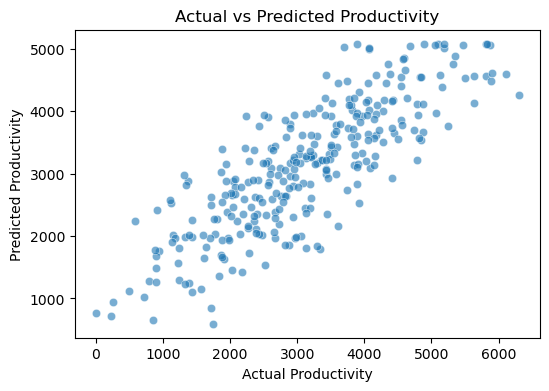

In [6]:
# Step 3: Multiple Linear Regression Model

# Select features and target
X = df[['YearsAtCompany', 'HoursWorked', 'FocusScore']]
y = df['ProductivityScore']

# Build and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# R-squared value
r2 = r2_score(y, y_pred)

# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Model R²:", round(r2, 3))
display(coefficients)

# Visualize predicted vs actual productivity
plt.figure(figsize=(6,4))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.title('Actual vs Predicted Productivity')
plt.show()


---------------------------------------------------------------------------------------------------------------------------------------------

### Summary and Recommendations

The analysis found that among all measured features, **FocusScore** had the strongest positive relationship with productivity (R² = 0.678). In comparison, **YearsAtCompany** and **HoursWorked** showed minimal or even negative relationships, indicating that tenure and total work hours do not significantly predict output.

A multiple linear regression model confirmed these findings, with an overall R² of 0.678. The coefficient for FocusScore (~495) shows that even small improvements in focus can lead to substantial productivity gains, while extended work hours slightly reduce performance, likely due to fatigue or burnout.

**Recommendations:**
- Encourage focused work blocks with fewer interruptions.
- Reduce unnecessary meetings and distractions.
- Implement mental recharge breaks to sustain engagement.
- Track focus metrics in performance evaluations rather than total hours worked.

In conclusion, maximizing employee **focus and engagement** is the most effective strategy to improve productivity across the company.
